           Date  Price   Open   High    Low    Vol. Change%  PriceBIST
0    01/02/2017   4.97   4.97   5.00   4.95  24.25M  -0.80%   78138.66
1    01/03/2017   4.88   4.98   4.99   4.88  55.63M  -1.81%   77754.46
2    01/04/2017   4.82   4.90   4.91   4.82  30.17M  -1.23%   76618.20
3    01/05/2017   4.96   4.85   4.98   4.79  85.51M   2.90%   76143.59
4    01/06/2017   4.94   4.94   5.00   4.91  44.00M  -0.40%   76386.30
..          ...    ...    ...    ...    ...     ...     ...        ...
600  05/20/2019  12.09  12.00  12.17  11.92  52.31M   0.58%   86796.06
601  05/21/2019  11.71  12.13  12.19  11.62  62.49M  -3.14%   86771.47
602  05/22/2019  11.26  11.71  11.87  11.24  73.27M  -3.84%   85309.58
603  05/23/2019  11.80  11.22  11.82  11.22  84.36M   4.80%   83675.33
604  05/24/2019  11.96  11.85  12.21  11.72  79.00M   1.36%   84596.16

[605 rows x 8 columns]
363


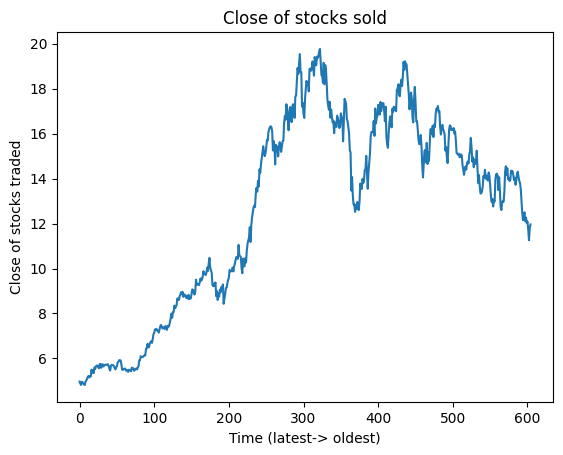

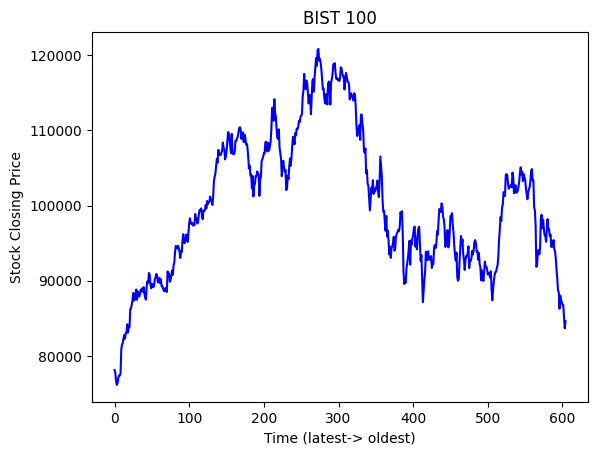

(605, 3)
(192, 3)
(413, 3)
Epoch 1/30
12/12 [==============================] - 2s 53ms/step - loss: 0.2103
Epoch 2/30
12/12 [==============================] - 1s 53ms/step - loss: 0.0334
Epoch 3/30
12/12 [==============================] - 1s 51ms/step - loss: 0.0121
Epoch 4/30
12/12 [==============================] - 1s 51ms/step - loss: 0.0086
Epoch 5/30
12/12 [==============================] - 1s 52ms/step - loss: 0.0058
Epoch 6/30
12/12 [==============================] - 1s 50ms/step - loss: 0.0046
Epoch 7/30
12/12 [==============================] - 1s 52ms/step - loss: 0.0038
Epoch 8/30
12/12 [==============================] - 1s 89ms/step - loss: 0.0034
Epoch 9/30
12/12 [==============================] - 1s 90ms/step - loss: 0.0034
Epoch 10/30
12/12 [==============================] - 1s 62ms/step - loss: 0.0031
Epoch 11/30
12/12 [==============================] - 1s 51ms/step - loss: 0.0028
Epoch 12/30
12/12 [==============================] - 1s 53ms/step - loss: 0.0027
Epoch 13/3

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load stock data from a CSV file
stock_data = pd.read_csv("/content/THYAO_ENDEKSLI.csv")

# Display the loaded data
print(stock_data)

# Calculate average stock price for each day
stock_data["Average"] = (stock_data["High"] + stock_data["Low"]) / 2

# Select specific columns for input features
input_feature = stock_data.iloc[:, [1, 7, 8]].values

# Set the lookback period and calculate the test size
lookback = 50
test_size = int(0.6 * len(stock_data))

# Display the test size
print(test_size)

# Create training and testing datasets
Train = input_feature[:test_size + lookback]
Test = input_feature[test_size + lookback:]

# Normalize and transform stock-related data using MinMaxScaler
scaler_prices = MinMaxScaler(feature_range=(0, 1))
scaler_bist = MinMaxScaler(feature_range=(0, 1))
scaler_average = MinMaxScaler(feature_range=(0, 1))

stock_prices = Test[:, 0].reshape(-1, 1)
stock_bist = Test[:, 1].reshape(-1, 1)
stock_average = Test[:, 2].reshape(-1, 1)

input_price = scaler_prices.fit_transform(stock_prices)
input_bist = scaler_bist.fit_transform(stock_bist)
input_average = scaler_average.fit_transform(stock_average)

# Inverse transform to get the original values
input_price_reverse = scaler_prices.inverse_transform(input_price)
input_bist_reverse = scaler_bist.inverse_transform(input_bist)
input_average_reverse = scaler_average.inverse_transform(input_average)

# Combine the scaled data into a single input array
input_data4 = np.hstack((input_price, input_bist, input_average))

# Visualize the closing price of stocks over time
plt.plot(input_feature[:, 0])
plt.title("Close of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Close of stocks traded")
plt.show()

# Visualize BIST 100 stock closing prices over time
plt.plot(input_feature[:, 1], color='blue')
plt.title("BIST 100")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Closing Price")
plt.show()

# Further scaling for training and testing datasets
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaler_test = MinMaxScaler(feature_range=(0, 1))

Train_features = input_feature[:test_size + lookback]
Test_features = input_feature[test_size + lookback:]

Train[:, 0:3] = scaler_train.fit_transform(Train_features[:, :])
Test[:, 0:3] = scaler_test.fit_transform(Test_features[:, :])

# Print shapes of arrays for verification
print(input_feature.shape)
print(Test.shape)
print(Train.shape)

# Prepare training data for machine learning models
X_train = []
y_train = []

for i in range(len(Train) - lookback - 1):
    t_train = []
    for j in range(0, lookback):
        t_train.append(Train[[(i + j)], :])
    X_train.append(t_train)
    y_train.append(Train[i + lookback, 0])

# Convert lists to numpy arrays and reshape for model input
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], lookback, 3)








# Reshape X_train for optimal use in machine learning models
X_train = X_train.reshape(X_train.shape[0], lookback, 3)

# Prepare testing data in a similar manner
look = lookback - 1
X_test = []
y_test = []

for i in range(len(Test) - look - 1):
    t_test = []
    for j in range(0, lookback):
        t_test.append(Test[[(i + j)], :])
    X_test.append(t_test)
    y_test.append(Test[i + lookback, 0])

# Convert lists to numpy arrays and reshape for model input
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape(X_test.shape[0], lookback, 3)

# Now, you have X_train, y_train, X_test, and y_test ready for training and testing machine learning models.

# ... Proceed with building and training your machine learning model using X_train and y_train ...

# For example, if using a simple LSTM model with TensorFlow and Keras:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(lookback, 3)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

print(f'Model Loss on Test Data: {loss}')









5/5 [==============================] - 0s 9ms/step


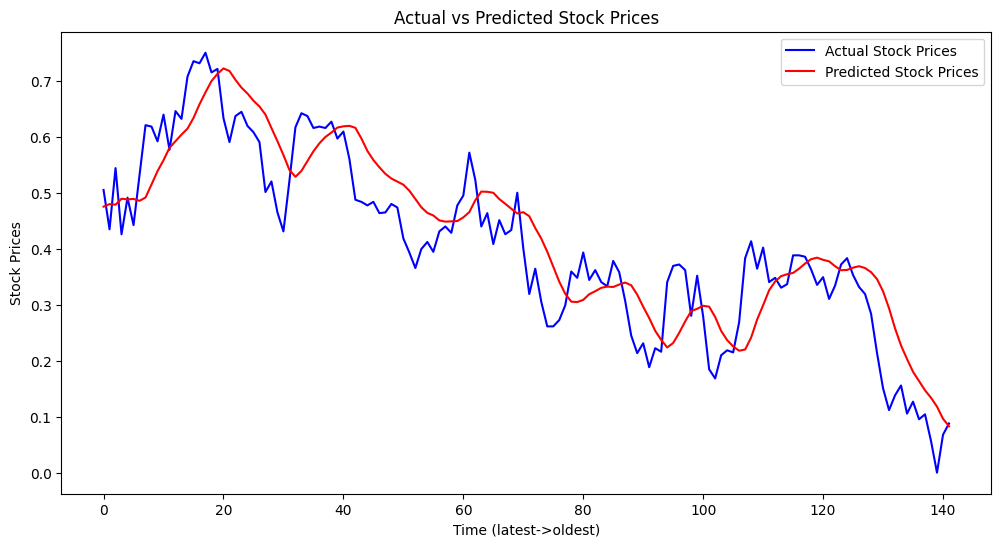

Mean Squared Error (MSE): 0.04938801178736369


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Visualize the predicted vs actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Stock Prices', color='blue')
plt.plot(predictions, label='Predicted Stock Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time (latest->oldest)')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

# Calculate and visualize the Mean Squared Error (MSE) as a measure of model performance
mse = np.mean((y_test - predictions) ** 2)
print(f'Mean Squared Error (MSE): {mse}')




# Optional: Save the trained model for future use
model.save('stock_price_prediction_model.h5')